# Imports

In [1]:
import numpy as np
import os
import pandas as pd
import plotnine as gg
gg.theme_set(gg.theme_classic)

In [2]:
from Functions import bool_from_index, name_from_index, zscore
from Functions import get_ages_cols, get_category_cols, get_param_names

## Directories etc.

In [3]:
data_path = "C:/Users/maria/MEGAsync/SLCNdata/Meta"
data_save_path = os.path.join(data_path, "all_data")

In [4]:
param_names = get_param_names()
ages_cols = get_ages_cols()

In [5]:
wanted_cols = [
    
    # Participant info
    'ID', 'PreciseYrs', 'BMI', 'Gender', 'meanT', 'PDS', 'age_group',
    
    # Basic performance
    'bf_ACC', 'bf_RT', 'bf_RTsd', 'bf_ACC_delta', 'bf_RT_delta', 'bf_miss',
    'rl_ACC', 'rl_RT', 'rl_RTsd', 'rl_ACC_delta', 'rl_RT_delta', 'rl_miss',
    'ps_ACC', 'ps_RT', 'ps_RTsd', 'ps_ACC_delta', 'ps_RT_delta', 'ps_miss',

    # WSLS & stay
    'bf_WS', 'bf_LS', 'bf_stay_choice', 'bf_stay_motor',
    'rl_WS', 'rl_LS', 'rl_stay_choice', 'rl_stay_motor',
    'ps_WS', 'ps_LS', 'ps_stay', 

    # Parameters
    'bf_alpha', 'bf_nalpha', 'bf_1_over_beta', 'bf_forget',
    'rl_log_alpha', 'rl_log_nalpha', 'rl_forget', 'rl_rho', 'rl_epsilon_1_over_beta', 'rl_K',
    'ps_alpha', 'ps_nalpha', 'ps_1_over_beta_rl', 'ps_persev_rl', 'ps_1_over_beta_bf', 'ps_persev_bf', 'ps_p_switch', 'ps_p_reward',
    
    # Additional measures
    'rl_ACC_ns2_minus_ns5', 'rl_ACC_ns2_minus_ns5_delta', 'rl_RT_ns5_minus_ns2', 'rl_nsslope',
    'rl_lrn-ns_sig', 'rl_lrn-delay_sig', 'rl_lrn-pcor_sig', 'rl_lrn-pinc_sig',
    'ps_n_switches', 'ps_WLS', 'ps_LWS', 'ps_criterion_trial',
#     'bf_exponential',
]

# Format all_data

## Read in all_data and selected wanted columns

In [6]:
all_data = pd.read_csv(os.path.join(data_save_path, "all_data_raw.csv"), index_col=0)
all_data = all_data[wanted_cols]
all_data.to_csv(os.path.join(data_save_path, 'all_data.csv'))
all_data

,ID,PreciseYrs,BMI,Gender,meanT,PDS,age_group,bf_ACC,bf_RT,bf_RTsd,...,rl_RT_ns5_minus_ns2,rl_nsslope,rl_lrn-ns_sig,rl_lrn-delay_sig,rl_lrn-pcor_sig,rl_lrn-pinc_sig,ps_n_switches,ps_WLS,ps_LWS,ps_criterion_trial
0,17,8.657084,18.200751,2.0,NaN,2.50,0.25,0.56667,1.33950,0.69630,...,0.47407,0.206890,0.403200,0.481715,0.619654,0.448061,8,0.111111,1.000000,3.666667
1,18,12.637919,16.157863,2.0,NaN,2.25,0.50,0.80000,1.19270,0.53170,...,0.23346,0.096175,0.493429,0.481895,0.620161,0.408597,8,0.870968,0.904762,4.222222
2,19,12.637919,14.316358,1.0,NaN,1.25,0.50,0.50000,0.83342,0.20657,...,0.22110,0.388713,0.222423,0.378723,0.706754,0.476280,9,0.896552,0.941176,4.700000
3,20,14.543463,17.433768,1.0,120.649667,2.80,0.75,0.85000,0.99265,0.52117,...,0.14064,-0.186282,0.340922,0.637521,0.651339,0.397819,8,1.000000,0.950000,4.000000
4,22,16.490075,22.709959,1.0,147.334443,3.00,1.00,0.73333,1.51800,1.03220,...,0.39956,0.237673,0.562095,0.383703,0.624645,0.389760,7,0.708333,0.933333,4.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,361,26.548605,24.535673,1.0,147.404443,NaN,3.00,0.93333,0.88116,0.38853,...,0.47052,0.262327,0.344747,0.526271,0.698078,0.469605,8,0.160000,1.000000,3.125000
200,362,26.537153,19.570339,2.0,62.423600,NaN,3.00,0.71667,1.07710,0.47210,...,0.39878,0.227607,0.280503,0.331781,0.671187,0.447047,7,0.280000,1.000000,3.571429
201,363,26.525700,21.948044,2.0,50.885900,NaN,3.00,0.70000,0.79164,0.24628,...,0.13411,0.014233,0.452310,0.583802,0.753450,0.543549,7,0.700000,0.857143,5.000000
202,364,26.514248,28.889081,2.0,40.583000,NaN,3.00,0.87500,0.83372,0.30266,...,0.08682,0.172745,0.498085,0.431167,0.611495,0.586996,6,0.526316,0.909091,3.714286


In [7]:
all_data_z = all_data[ages_cols + ['age_group']]
for col in [col for col in all_data.columns if not col in ages_cols + ['age_group']]:
    all_data_z[col] = zscore(all_data[col])
    
# Save
all_data_z.to_csv(os.path.join(data_save_path, 'all_data_z.csv'))
all_data_z

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ID,PreciseYrs,BMI,Gender,meanT,PDS,age_group,bf_ACC,bf_RT,bf_RTsd,...,rl_RT_ns5_minus_ns2,rl_nsslope,rl_lrn-ns_sig,rl_lrn-delay_sig,rl_lrn-pcor_sig,rl_lrn-pinc_sig,ps_n_switches,ps_WLS,ps_LWS,ps_criterion_trial
0,17,8.657084,18.200751,2.0,NaN,2.50,0.25,-1.199400,0.303275,0.031436,...,0.988229,0.487809,-0.121373,0.273319,-0.348089,-0.087280,0.719695,-1.486037,0.559503,-0.496576
1,18,12.637919,16.157863,2.0,NaN,2.25,0.50,0.341816,-0.089244,-0.499058,...,-0.564896,-0.228929,0.669779,0.274954,-0.342012,-0.522431,0.719695,1.037059,0.075912,0.528750
2,19,12.637919,14.316358,1.0,NaN,1.25,0.50,-1.639775,-1.049897,-1.546928,...,-0.644679,1.664876,-1.706461,-0.661170,0.696730,0.223884,1.849063,1.122010,0.260814,1.410531
3,20,14.543463,17.433768,1.0,120.649667,2.80,0.75,0.672081,-0.624143,-0.532995,...,-1.164044,-2.057479,-0.667442,1.687012,0.031992,-0.641269,0.719695,1.465509,0.305618,0.118620
4,22,16.490075,22.709959,1.0,147.334443,3.00,1.00,-0.098560,0.780553,1.114017,...,0.507271,0.687086,1.271857,-0.615988,-0.288223,-0.730131,-0.409673,0.497033,0.220989,0.580017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,361,26.548605,24.535673,1.0,147.404443,NaN,3.00,1.222501,-0.922248,-0.960484,...,0.965314,0.846695,-0.633899,0.677592,0.592652,0.150281,0.719695,-1.323702,0.559503,-1.496269
200,362,26.537153,19.570339,2.0,62.423600,NaN,3.00,-0.208604,-0.398338,-0.691144,...,0.502236,0.621928,-1.197209,-1.087098,0.270086,-0.098458,-0.409673,-0.925243,0.559503,-0.672346
201,363,26.525700,21.948044,2.0,50.885900,NaN,3.00,-0.318714,-1.161610,-1.418945,...,-1.206194,-0.759401,0.309239,1.199596,1.256886,0.965633,-0.409673,0.469362,-0.165884,1.964207
202,364,26.514248,28.889081,2.0,40.583000,NaN,3.00,0.837214,-1.049095,-1.237237,...,-1.511449,0.266764,0.710596,-0.185324,-0.445964,1.444697,-1.539040,-0.107354,0.097893,-0.408691


In [8]:
def wsls_row_bool(feature):
    
    if ('WLS' in feature) or ('LWS' in feature):
        return True
    else:
        return False

# # Example use
# all_data_long.loc[all_data_long.feature.apply(wsls_row_bool), 'category'] = 'WSLS'
# all_data_long

In [9]:
def get_category_from_feature(data):
    
    category_cols = get_category_cols()
    category = data['feature'].apply(name_from_index, names=param_names + category_cols)
    category[category == 'p_switch_emp'] = 'ACC'
    category[category == 'p_reward'] = 'alpha'
    category[data.feature.apply(wsls_row_bool)] = 'XXS'

    return category

# # Example use
# get_category_from_feature(all_data_long)

In [10]:
# Melt all_data
all_data_long = all_data.melt(id_vars=ages_cols+['age_group'], var_name='feature')

# Add columns
all_data_long['category'] = get_category_from_feature(all_data_long)
all_data_long['task'] = all_data_long.feature.apply(lambda x : x[:2])
all_data_long['param'] = all_data_long.feature.apply(lambda x : x[3:])

# Save
all_data_long.to_csv(os.path.join(data_save_path, 'all_data_long.csv'))
all_data_long

,ID,PreciseYrs,BMI,Gender,meanT,PDS,age_group,feature,value,category,task,param
0,17,8.657084,18.200751,2.0,NaN,2.50,0.25,bf_ACC,0.566670,ACC,bf,ACC
1,18,12.637919,16.157863,2.0,NaN,2.25,0.50,bf_ACC,0.800000,ACC,bf,ACC
2,19,12.637919,14.316358,1.0,NaN,1.25,0.50,bf_ACC,0.500000,ACC,bf,ACC
3,20,14.543463,17.433768,1.0,120.649667,2.80,0.75,bf_ACC,0.850000,ACC,bf,ACC
4,22,16.490075,22.709959,1.0,147.334443,3.00,1.00,bf_ACC,0.733330,ACC,bf,ACC
...,...,...,...,...,...,...,...,...,...,...,...,...
12031,361,26.548605,24.535673,1.0,147.404443,NaN,3.00,ps_criterion_trial,3.125000,None,ps,criterion_trial
12032,362,26.537153,19.570339,2.0,62.423600,NaN,3.00,ps_criterion_trial,3.571429,None,ps,criterion_trial
12033,363,26.525700,21.948044,2.0,50.885900,NaN,3.00,ps_criterion_trial,5.000000,None,ps,criterion_trial
12034,364,26.514248,28.889081,2.0,40.583000,NaN,3.00,ps_criterion_trial,3.714286,None,ps,criterion_trial


In [11]:
# Melt all_data_z
all_data_long_z = all_data_z.melt(id_vars=ages_cols+['age_group'], var_name='feature')

# Add columns
all_data_long_z['category'] = get_category_from_feature(all_data_long_z)
all_data_long_z['task'] = all_data_long_z.feature.apply(lambda x : x[:2])
all_data_long_z['param'] = all_data_long_z.feature.apply(lambda x : x[3:])

# Save
all_data_long_z.to_csv(os.path.join(data_save_path, 'all_data_long_z.csv'))
all_data_long_z

,ID,PreciseYrs,BMI,Gender,meanT,PDS,age_group,feature,value,category,task,param
0,17,8.657084,18.200751,2.0,NaN,2.50,0.25,bf_ACC,-1.199400,ACC,bf,ACC
1,18,12.637919,16.157863,2.0,NaN,2.25,0.50,bf_ACC,0.341816,ACC,bf,ACC
2,19,12.637919,14.316358,1.0,NaN,1.25,0.50,bf_ACC,-1.639775,ACC,bf,ACC
3,20,14.543463,17.433768,1.0,120.649667,2.80,0.75,bf_ACC,0.672081,ACC,bf,ACC
4,22,16.490075,22.709959,1.0,147.334443,3.00,1.00,bf_ACC,-0.098560,ACC,bf,ACC
...,...,...,...,...,...,...,...,...,...,...,...,...
12031,361,26.548605,24.535673,1.0,147.404443,NaN,3.00,ps_criterion_trial,-1.496269,None,ps,criterion_trial
12032,362,26.537153,19.570339,2.0,62.423600,NaN,3.00,ps_criterion_trial,-0.672346,None,ps,criterion_trial
12033,363,26.525700,21.948044,2.0,50.885900,NaN,3.00,ps_criterion_trial,1.964207,None,ps,criterion_trial
12034,364,26.514248,28.889081,2.0,40.583000,NaN,3.00,ps_criterion_trial,-0.408691,None,ps,criterion_trial


# Check that everything looks good

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


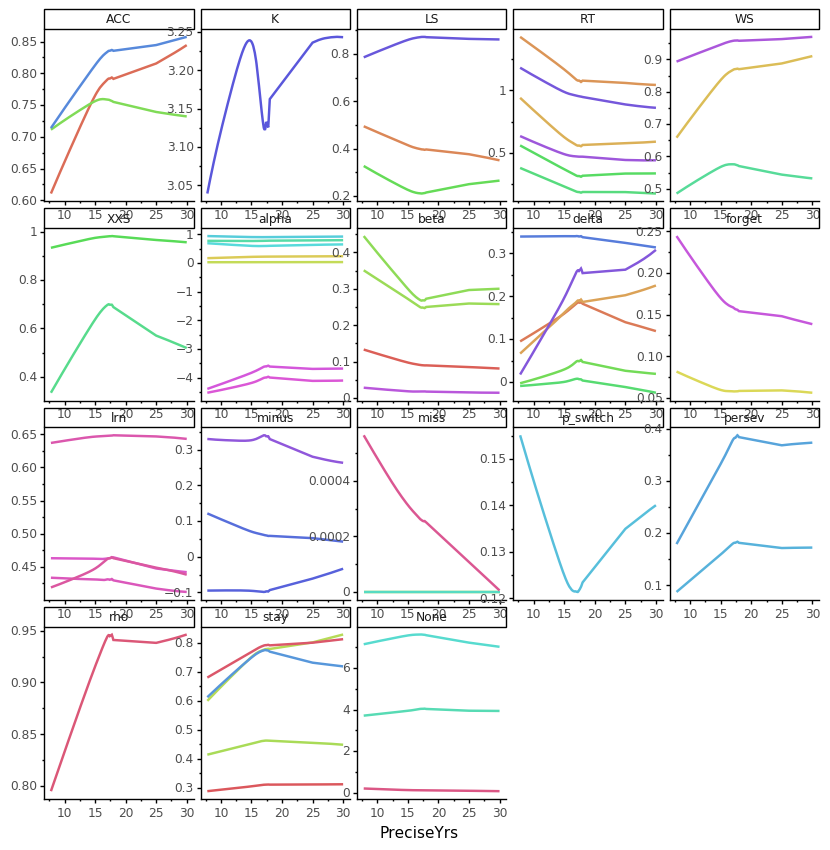

<ggplot: (-9223371908232738458)>


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


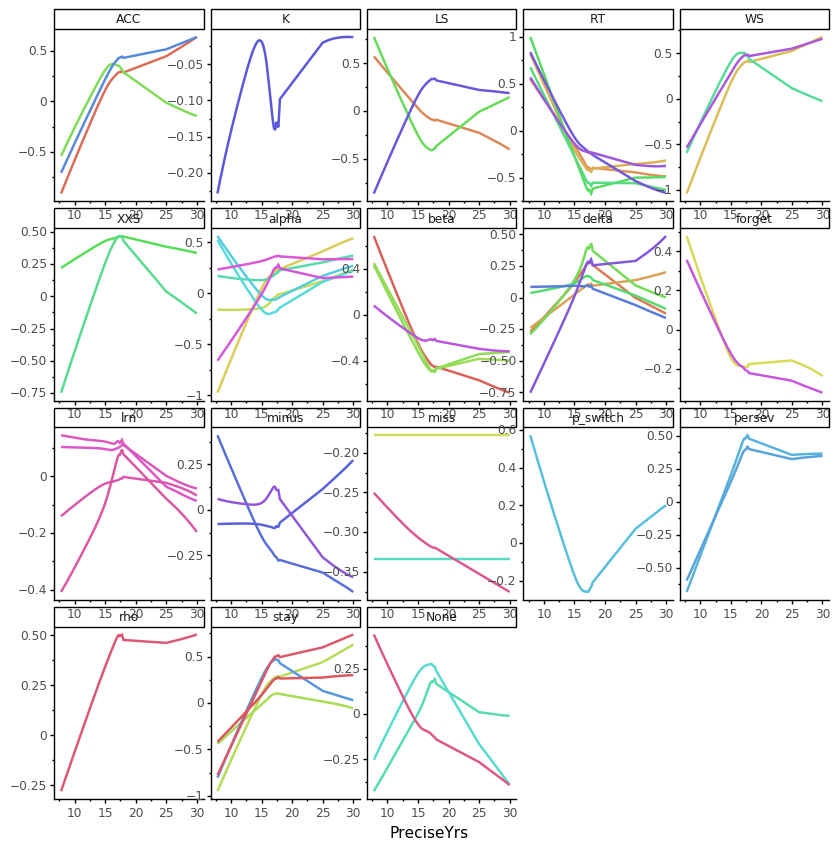

<ggplot: (-9223371908232738458)>


In [12]:
# Group features
gg.options.figure_size = (10, 10)
g = (gg.ggplot(
    all_data_long,#[all_data_long.category == 'lrn'],
    gg.aes('PreciseYrs', 'value', color='feature'))
#  + gg.geom_point(size=0.5, alpha=0.5)
 + gg.theme(legend_position='none')
 + gg.labs(y='', color='')
 + gg.geom_smooth()
 + gg.facet_wrap('~ category', scales='free')
)
print(g)

g_z = g
g_z.data = all_data_long_z

print(g_z)